# 3.2.4 + 3.2.5

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [96]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

1

In [97]:
c = [1,2,3,4,5,6,7,8,9]
c = [(1 + c)*10**-9 for c in c]
t_x = [92, 104, 128, 148, 156, 164, 176, 188, 196]

t_th = [2*math.pi*math.sqrt(0.1*c) *10**6 for c in c]

t_x, t_th

([92, 104, 128, 148, 156, 164, 176, 188, 196],
 [88.85765876316732,
  108.82796185405306,
  125.66370614359174,
  140.49629462081452,
  153.9059796194237,
  166.23745764132164,
  177.71531752633464,
  188.49555921538763,
  198.69176531592203])

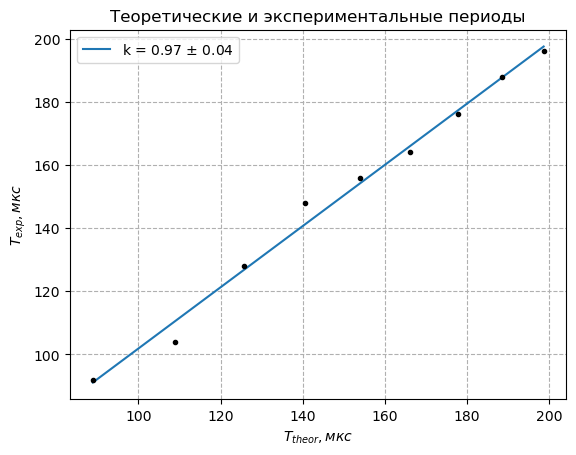

In [98]:
plt.figure()
plt.title("Теоретические и экспериментальные периоды")
plt.xlabel("$T_{theor}, мкс$")
plt.ylabel("$T_{exp}, мкс$")

plt.grid(True, linestyle="--")
plt.errorbar([i for i in t_th], [i for i in t_x], fmt=".k")

k,b,kerr,berr = LeastSquares(t_th, t_x)

x = np.array([min(t_th), max(t_th)])
plt.plot(x, k*x + b, label=f'k = {round(k, 2)} $\\pm$ {round(kerr, 2)}')

plt.legend()
plt.show()

2

In [99]:
c_star = 6 * 10**-9
R_cr = 2 * math.sqrt(0.1/c_star)

R = [408.25, 608.25, 808.25, 1000, 1400, 1800]
# R = [35 + i for i in R]

theta = [-0.41, math.log(3.68/6.60),
         math.log(3.0/6.36),
         math.log(2.52/ 6.16),
         math.log(1.6/5.76),
         math.log(1.12/5.4)]

theta_1 = [1/i**2 for i in theta]
R_1     = [1/i**2 for i in R]


theta

[-0.41,
 -0.5841568968515403,
 -0.7514160886839212,
 -0.8938178760220965,
 -1.2809338454620642,
 -1.5730702682632256]

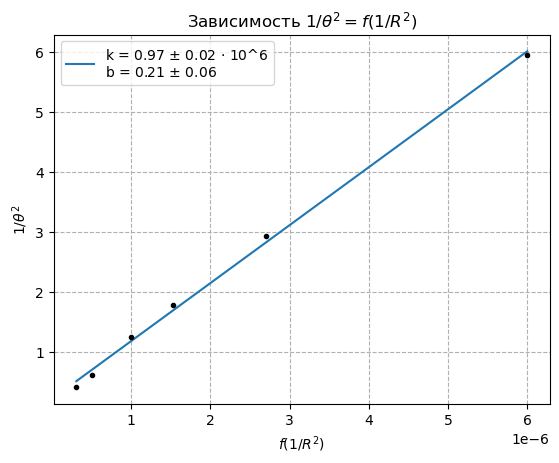

In [100]:
plt.figure()
plt.title("Зависимость $1/\\theta^2 = f(1/R^2)$")
plt.xlabel("$f(1/R^2)$")
plt.ylabel("$1/\\theta^2$")

plt.grid(True, linestyle="--")
plt.errorbar([i for i in R_1], [i for i in theta_1], fmt=".k")

k,b,kerr,berr = LeastSquares(R_1, theta_1)

x = np.array([min(R_1), max(R_1)])
plt.plot(x, k*x + b, label=f'k = {round(k/1e6, 2)} $\\pm$ {round(kerr/1e6, 2)} $\\cdot$ 10^6\n' +
  f'b = {round(b, 2)} $\\pm$ {round(berr, 2)}')

plt.legend()
plt.show()

In [101]:
R_cr = 2*math.pi *math.sqrt(k)
R_cr, kerr * math.pi / math.sqrt(k)


(6182.333492588768, np.float64(72.62276256382125))

In [111]:
math.pi / 1.46

2.1517757901299954

In [107]:
1/2 * math.sqrt(0.4/6/1800**2 * 10**9 - 1)

2.2122461259567614